# D599 Task 2

The below project addresses all prompts from D599 Task 2.

The code below sets up my environment and imports our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import f_oneway, mannwhitneyu
import statsmodels.api as sm

df = pd.read_csv("Health Insurance Dataset.csv")
df.head(10)

,age,sex,bmi,height,children,smoker,region,charges,Level,score
0,19,female,27.90,64.03,0,yes,southwest,16884.92,B,72
1,31,female,25.74,66.63,0,no,southeast,3756.62,B,71
2,46,female,33.44,61.39,1,no,southeast,8240.59,B,88
3,37,female,27.74,63.62,3,no,northwest,7281.51,B,40
4,60,female,25.84,68.64,0,no,northwest,28923.14,B,38
5,62,female,26.29,64.89,0,yes,southeast,27808.73,D,40
6,56,female,39.82,61.13,0,no,southeast,11090.72,A,78
7,52,female,30.78,62.59,1,no,northeast,10797.34,C,88
8,60,female,36.01,65.44,0,no,northeast,13228.85,D,66
9,30,female,32.40,65.26,1,no,southwest,4149.74,B,65


### Univariate Visualization

I chose to visualize the variables: smoker, sex, age, and height.

The below visualization addresses the smoking variable as a barplot.

Text(0.5, 1.0, 'Smoking Status')

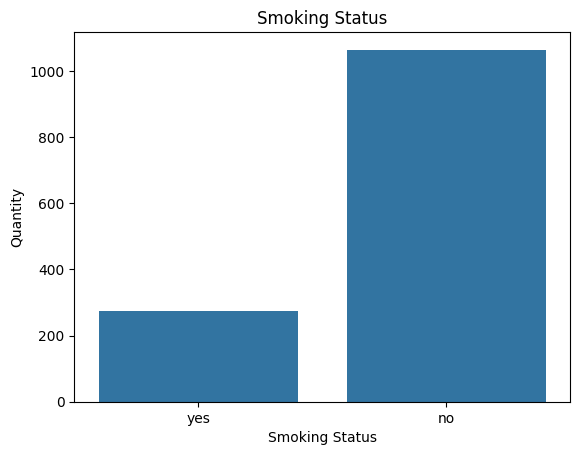

In [2]:
sns.countplot(data=df, x="smoker")
plt.xlabel("Smoking Status")
plt.ylabel("Quantity")
plt.title("Smoking Status")

The below visualization addresses the sex variable as a bar plot.

Text(0.5, 1.0, 'Customer Gender')

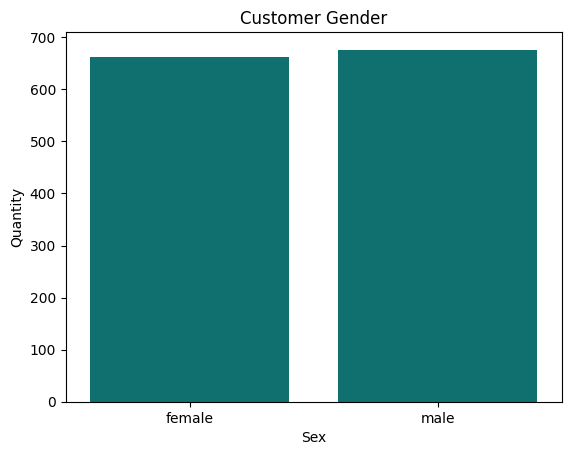

In [3]:
sns.countplot(data=df, x="sex", color="teal")
plt.xlabel("Sex")
plt.ylabel("Quantity")
plt.title("Customer Gender")

The code below addresses the age variable as a histogram

Text(0.5, 1.0, 'Age Distribution')

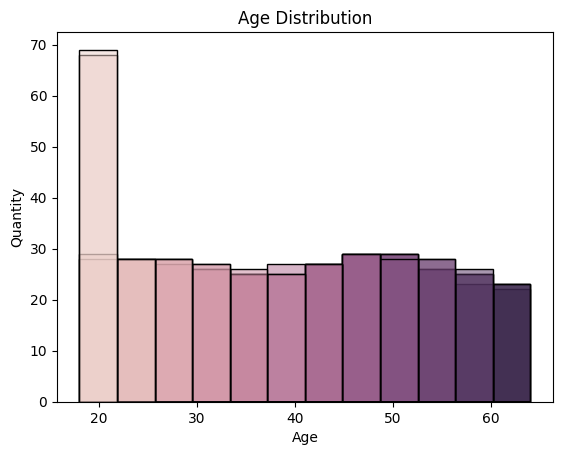

In [4]:
sns.histplot(data=df, x="age", hue="age", legend=False)
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.title("Age Distribution")

The final visualization below addresses the height variable as a histogram.

Text(0.5, 1.0, 'Height Distribution')

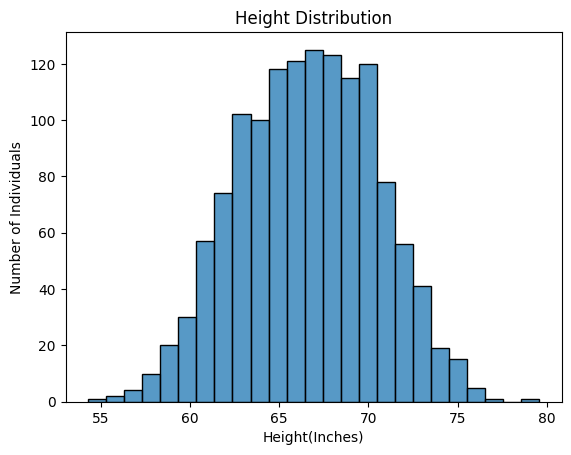

In [5]:
sns.histplot(data=df, x="height")
plt.xlabel("Height(Inches)")
plt.ylabel("Number of Individuals")
plt.title("Height Distribution")

### Bivariate Visualization

The code below provides 2 bivariate visualizations for the smoker variable based on either sex or age.

Text(0.5, 1.0, 'Smoking Status Based on Age')

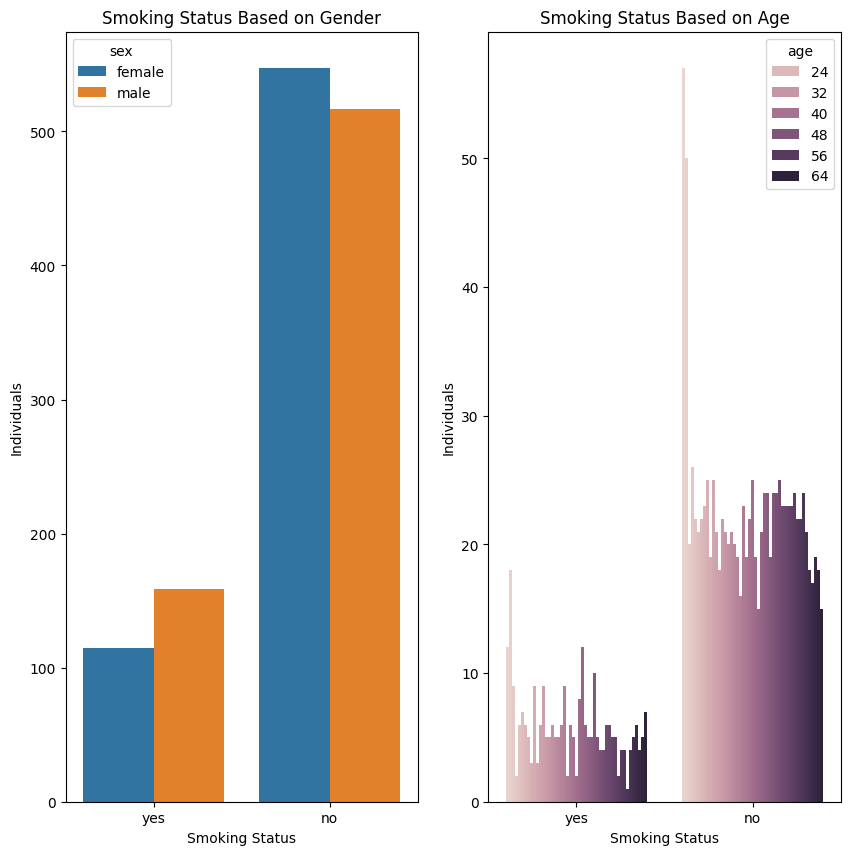

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.countplot(data=df, x="smoker", hue="sex", ax=axes[0])
axes[0].set_xlabel("Smoking Status")
axes[0].set_ylabel("Individuals")
axes[0].set_title("Smoking Status Based on Gender")
sns.countplot(data=df, x="smoker", hue="age", ax=axes[1])
axes[1].set_xlabel("Smoking Status")
axes[1].set_ylabel("Individuals")
axes[1].set_title("Smoking Status Based on Age")

The code below provides 2 bivariate visualizations for the sex variable based on either children or height.

Text(0.5, 1.0, 'Sex Based on Height')

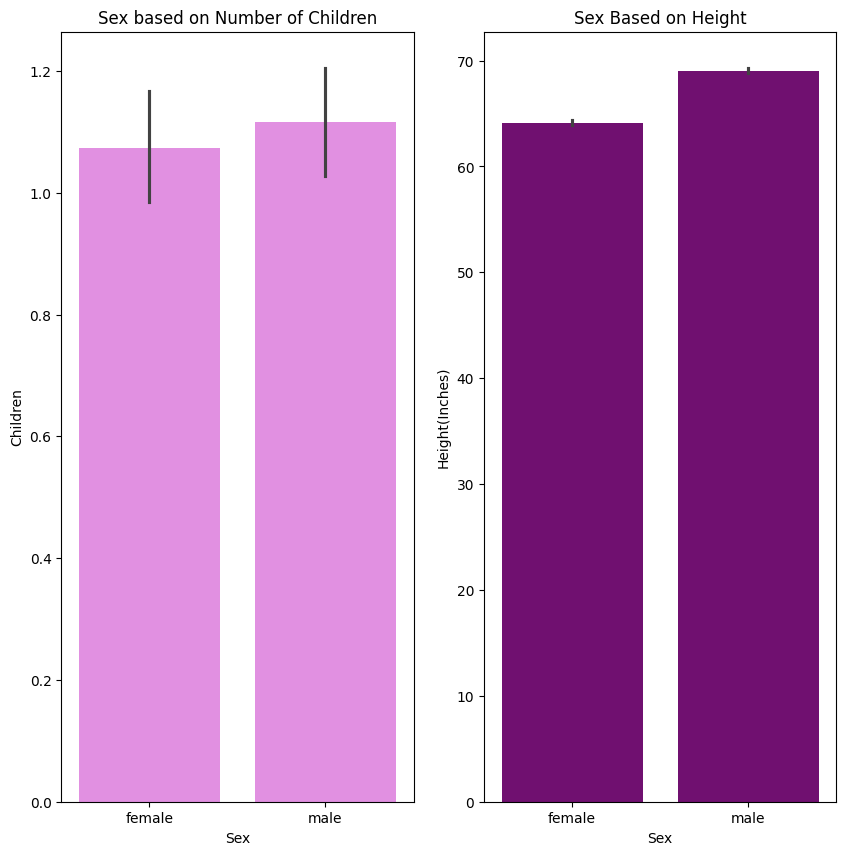

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.barplot(data=df, x="sex", y="children", ax=axes[0], color="violet")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Children")
axes[0].set_title("Sex based on Number of Children")
sns.barplot(data=df, x="sex", y="height", ax=axes[1], color="purple")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Height(Inches)")
axes[1].set_title("Sex Based on Height")

The below code creates 2 bivariate visualizations for the variable age based on score and BMI.

Text(0.5, 1.0, 'Age based on BMI')

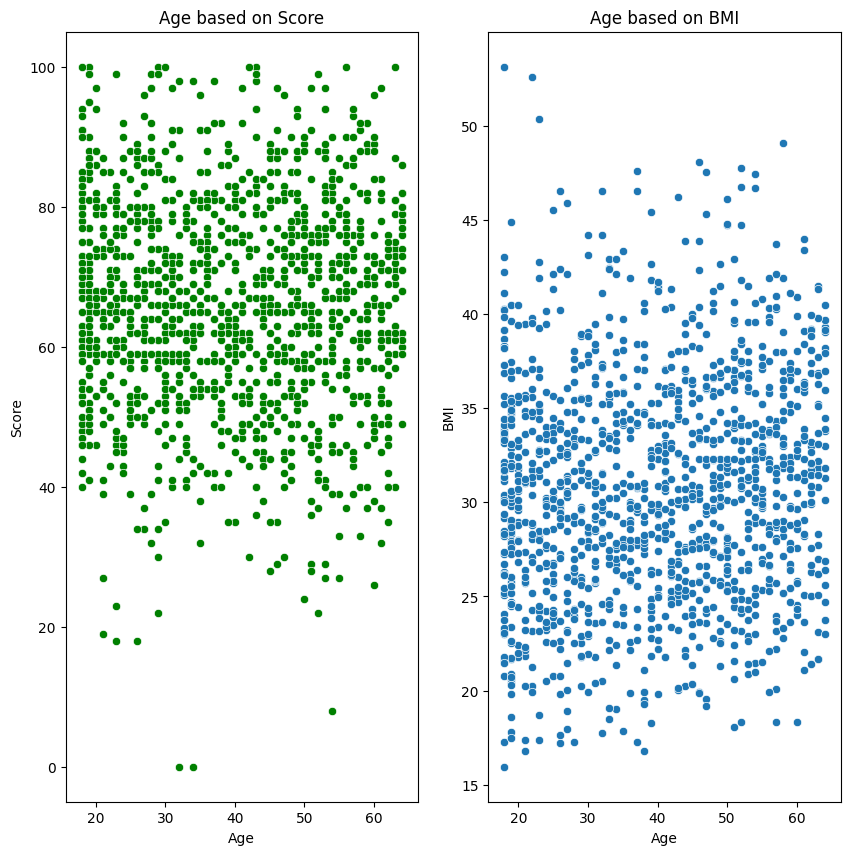

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.scatterplot(data=df, x="age", y="score", ax=axes[0], color="green")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Score")
axes[0].set_title("Age based on Score")
sns.scatterplot(data=df, x="age", y="bmi", ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("BMI")
axes[1].set_title("Age based on BMI")

The code below creates 2 bivariate visualizations for the variable height based on BMI and region.

Text(0.5, 1.0, 'Height Based on Region')

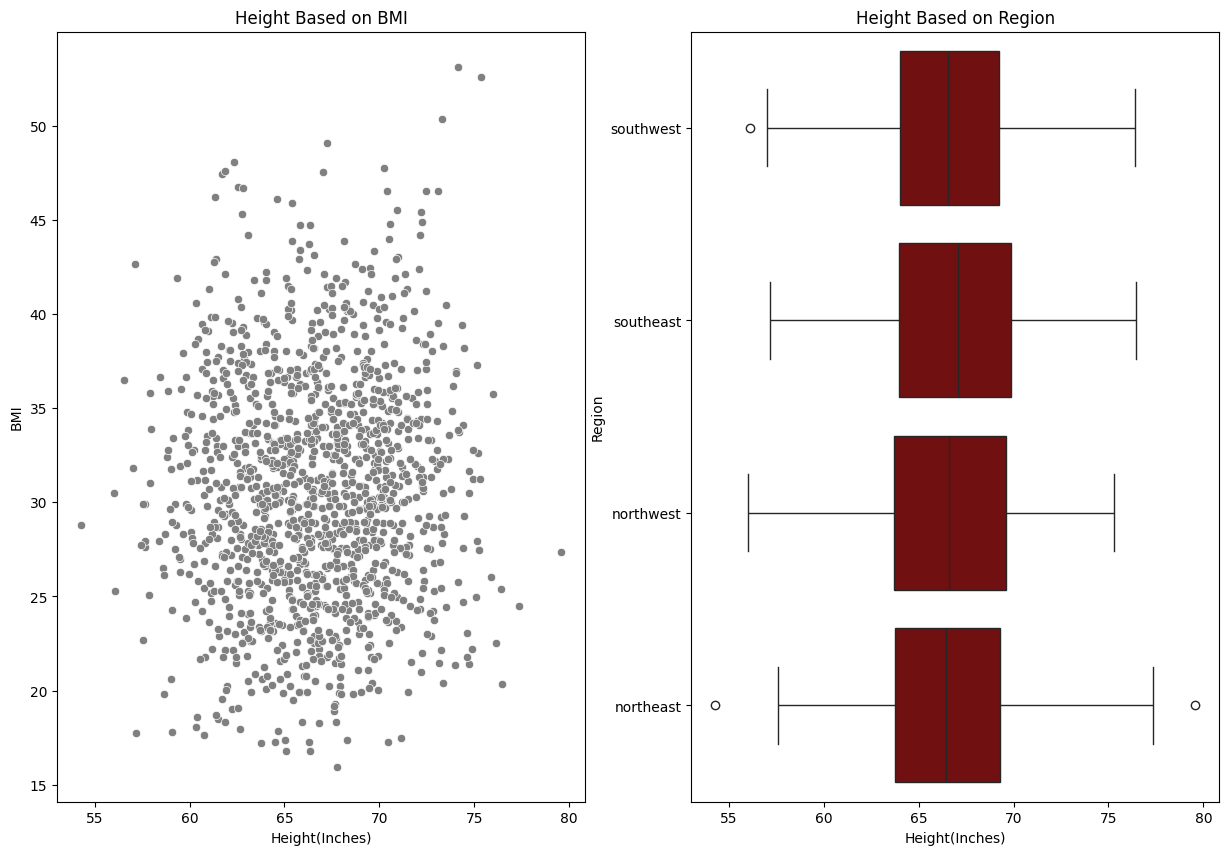

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.scatterplot(data=df, x="height", y="bmi", ax=axes[0], color="gray")
axes[0].set_xlabel("Height(Inches)")
axes[0].set_ylabel("BMI")
axes[0].set_title("Height Based on BMI")
sns.boxplot(data=df, x="height", y="region", ax=axes[1], color="maroon")
axes[1].set_xlabel("Height(Inches)")
axes[1].set_ylabel("Region")
axes[1].set_title("Height Based on Region")

## Descriptive Statistics

Below I provide the descriptive statistics for all variables in our dataset.

In [10]:
df.describe(include="all")

,age,sex,bmi,height,children,smoker,region,charges,Level,score
count,1338.000000,1338,1338.000000,1338.000000,1338.000000,1338,1338,1338.000000,1338,1338.000000
unique,NaN,2,NaN,NaN,NaN,2,4,NaN,5,NaN
top,NaN,male,NaN,NaN,NaN,no,southeast,NaN,C,NaN
freq,NaN,676,NaN,NaN,NaN,1064,364,NaN,427,NaN
mean,39.207025,NaN,30.663987,66.607682,1.094918,NaN,NaN,13270.422292,NaN,65.967115
std,14.049960,NaN,6.098063,3.867210,1.205493,NaN,NaN,12110.011242,NaN,15.235684
min,18.000000,NaN,15.960000,54.280000,0.000000,NaN,NaN,1121.873900,NaN,0.000000
25%,27.000000,NaN,26.296250,63.816668,0.000000,NaN,NaN,4740.288500,NaN,56.250000
50%,39.000000,NaN,30.400000,66.601959,1.000000,NaN,NaN,9382.033000,NaN,66.000000
75%,51.000000,NaN,34.693750,69.465980,2.000000,NaN,NaN,16639.914427,NaN,77.000000


## Parametric Statistical Testing

For this portion I will be utilizing the variables BMI and Region to discover if BMI differs between regions. I will first evaluate the distribution of the BMI data. To do this I will plug the values into a histogram and quartile plot to evaluate the distribution and shape of the data.

Text(0.5, 1.0, 'BMI Against a Normal Distribution')

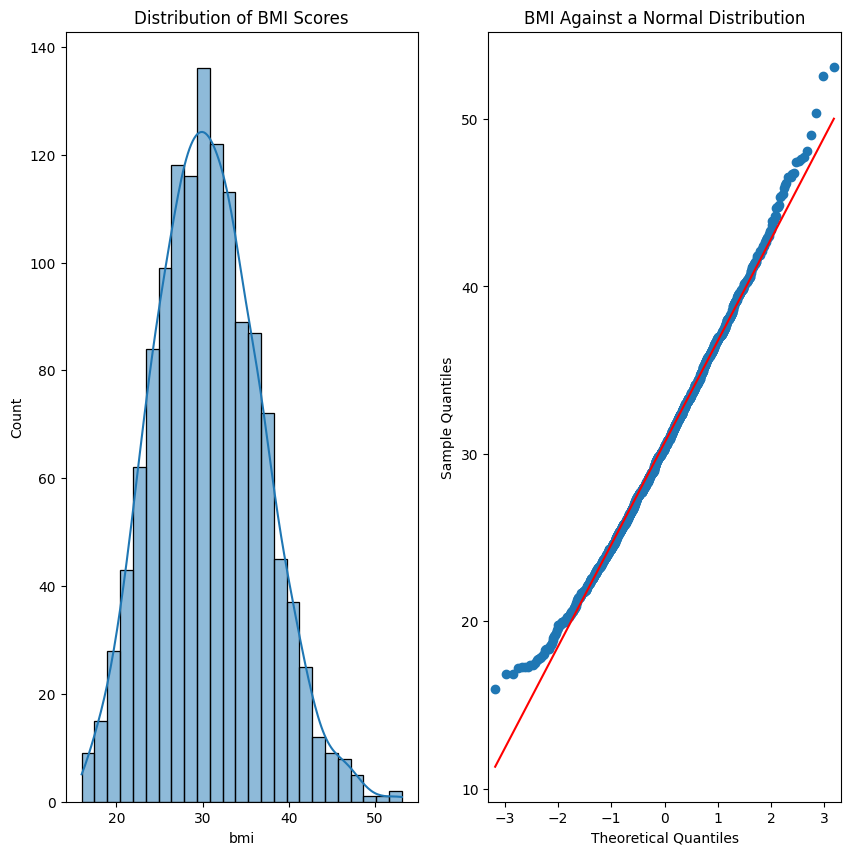

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.histplot(data=df["bmi"], ax=axes[0], kde=True)
axes[0].set_title("Distribution of BMI Scores")
sm.qqplot(data=df["bmi"], ax=axes[1], line="s")
axes[1].set_title("BMI Against a Normal Distribution")

From the code above we can see that BMI is normally distributed and suitable for a one-way AVOSA test to determine if there is a significant difference between the mean BMI between regions. This is appropriate due to continuous nature of BMI, and the multiple independent regions, indicating the use of the AVOSA one way test.

Null Hypothesis: There is no significant difference between the mean BMI between regions.
<br/>Hypothesis: There is a significant difference between the mean BMI between regions.

In [12]:
bmi_northwest = df[df["region"] == "northwest"]['bmi']
bmi_northeast = df[df["region"] == "northeast"]['bmi']
bmi_southwest = df[df["region"] == "southwest"]['bmi']
bmi_southeast = df[df["region"] == "southeast"]['bmi']

stat, p_value = f_oneway(bmi_northeast, bmi_northwest, bmi_southeast, bmi_southwest)
print(f"\nAVOSA f-stat: {stat}\nAVOSA P-Value: {p_value}")
print(f"Mean BMI for NW: {bmi_northwest.mean().round(2)}")
print(f"Mean BMI for NE: {bmi_northeast.mean().round(2)}")
print(f"Mean BMI for SW: {bmi_southwest.mean().round(2)}")
print(f"Mean BMI for SE: {bmi_southeast.mean().round(2)}")


AVOSA f-stat: 39.472063783709196
AVOSA P-Value: 1.941894768013301e-24
Mean BMI for NW: 29.2
Mean BMI for NE: 29.17
Mean BMI for SW: 30.6
Mean BMI for SE: 33.36


There is a significant difference between the mean BMI between regions. The difference is not due to variance(F-stat= 39) and the likelihood of the difference being random is near-zero(p < 0.05). Due to this we will reject the null hypothesis and conclude that the mean BMI differs between regions.

This is valuable for shareholders as this can influence regional advertisements and premiums. By determining which regions have specific characteristics, marketing and logistical efforts can be guided by this data. I would recommend following up this data with marketing efforts and premium adjustments for regions with a higher BMI, as they are at a higher risk of needing insurance.

The limitations of this analysis could manifest if the data was unevenly distributed. This test assumes a normal distribution and could skew results heavily if that is not the case. However, due to the fact that I ensured the BMI data had a normal distribution, the odds of my results being inaccurate are very low.

## Non-Parametric Statistical Testing

Below I perform non-parametric statistical testing on the charges column evaluating the mean insurance charges for smokers vs non-smokers.
Due to the nature of this test, comparing the means of two independent groups, I will be using a Mann-Whitney U test.

Before beginning I will ensure the data does not have a normal distribution. I will do this by visualizing the data with a histogram and quartile plot.


Text(0.5, 1.0, 'Insurance Charges Compared to Normal Distribution')

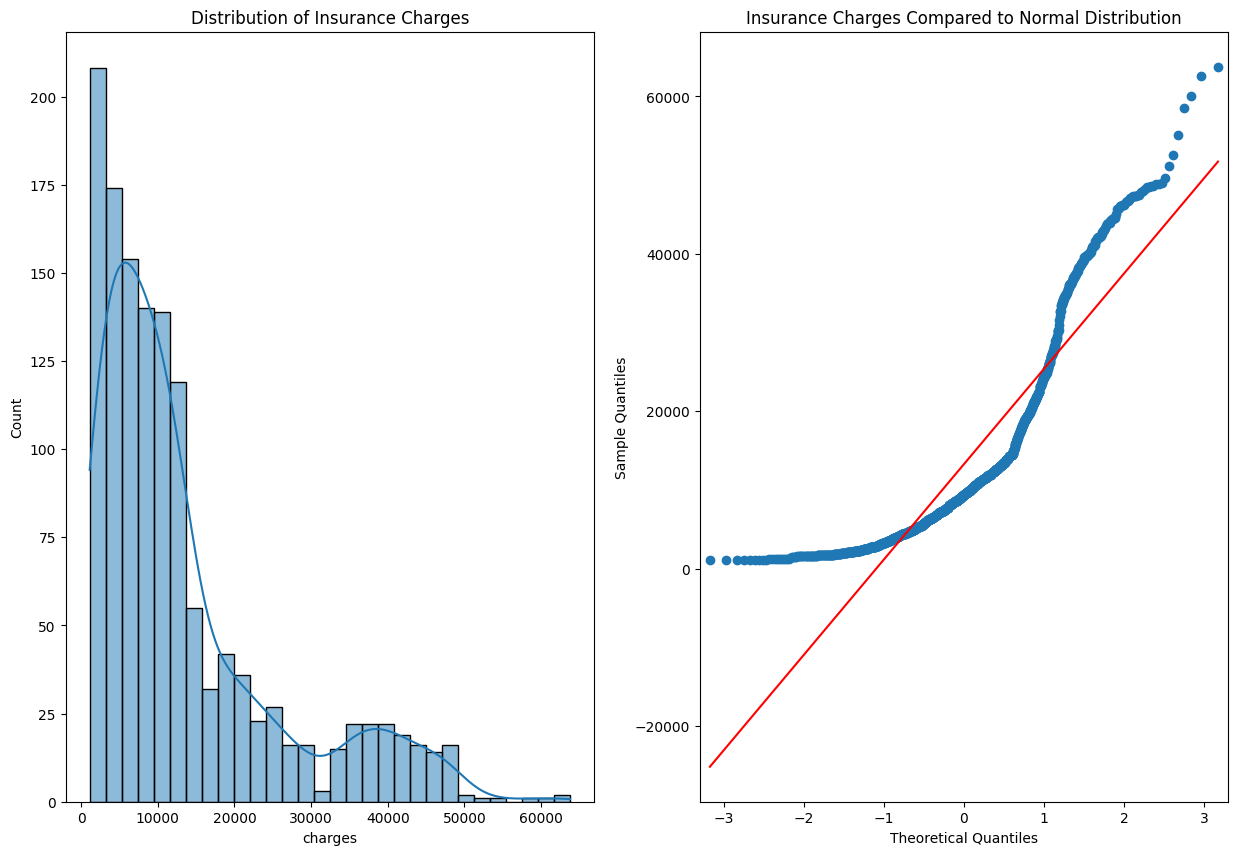

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

sns.histplot(df["charges"], ax=axes[0], kde=True)
axes[0].set_title("Distribution of Insurance Charges")

sm.qqplot(df["charges"], ax=axes[1], line="s")
axes[1].set_title("Insurance Charges Compared to Normal Distribution")

From our visualizations above we can see that insurance charges are skewed right, with some portions of customers paying substantially more than the majority. This is again reinforced by the quartile plot, showing an "S" shape, indicating the prescence of significant outliers. All of this supports the variable "charges" to be distributed in a non-normal way.

Due to this we will continue with the Mann-Whitney U test.

Null hypothesis: There is no significant difference between the mean insurance charges of smokers vs non-smokers.

Hypothesis: There is a significant difference between the mean insurance charges of smokers vs non-smokers.

In [14]:
smokers = df[df["smoker"] == "yes"]["charges"]
nonSmokers = df[df["smoker"] == "no"]["charges"]

stat, p_value = mannwhitneyu(smokers, nonSmokers)

print(f"\nMannWhitneyU P-value: {p_value}")
print(f"Mean Insurance Charges for Smokers: {smokers.mean().round(2)}")
print(f"Mean Insurance Charges for Non-Smokers: {nonSmokers.mean().round(2)}")



MannWhitneyU P-value: 5.270233444503571e-130
Mean Insurance Charges for Smokers: 32050.23
Mean Insurance Charges for Non-Smokers: 8434.27


After performing the test we can see that smokers have a much higher mean insurance charge than non-smokers. The difference is large and the chance of it being random is essentially zero(p < 0.05). Therefore, we reject the null hypothesis and conclude that smokers pay a higher insurance charge, on average, than non-smokers.

This is valuable for shareholders as a company could screen insurance applicants for their smoking status and adjust their insurance charge based on this factor. Smokers paying more on average equates to their need for insurance is higher and thus the insurance company can charge them more as they are higher risk.

Some limitations that can occur with this method of testing is this test assumes the data will be normally distributed. If the data is skewed in some way the test could lose some levels of accuracy.

Thank you for taking the time to review my D599 task 2 report. All materials used were from WGU course materials or personal experience.